In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
438,5886-VLQVU,Male,0,Yes,No,35,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.85,3161.2,No
648,5644-PDMZC,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,89.50,161.5,Yes
2688,1569-TTNYJ,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.75,412.1,Yes
5657,3096-GKWEB,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,1691.9,No
4947,4735-ASGMA,Male,0,No,No,26,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.35,2515.3,Yes


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
517400/df.shape[0]

73.46301292063042

In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df.iloc[488].TotalCharges

' '

In [13]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


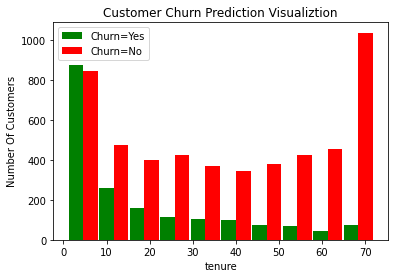

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

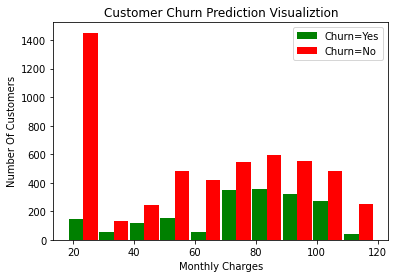

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')


In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [24]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')


gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [29]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5034,1,1,1,1,48,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2336,0,0,1,0,17,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5061,1,1,1,1,55,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
6865,1,0,1,0,8,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
3891,0,0,1,0,42,1,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [33]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')


gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [34]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [36]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [37]:
5163/1869


2.7624398073836276

In [38]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [39]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

In [41]:
X_train[:10]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [42]:
len(X_train.columns)

26

In [43]:
!python -m pip install tensorflow-addons

You should consider upgrading via the 'C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [44]:
from tensorflow_addons import losses

In [45]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds


In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7221
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.7954
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.8018
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8076
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8064
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4081 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8318
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8338
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8363
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3529 - accuracy: 0.8313
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8315
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8336
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8327
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8356
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8377
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 

In [175]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]
df_class_0.shape

(5163, 27)

In [151]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())


Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [152]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [153]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [154]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6275 - accuracy: 0.6652
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7642
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7736
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7739
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7776
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7773
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7803
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.7793
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7833
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8224
Epoch 83/100
94/94 [==============================] - 0s 969us/step - loss: 0.3832 - accuracy: 0.8237
Epoch 84/100
94/94 [==============================] - 0s 947us/step - loss: 0.3846 - accuracy: 0.8197
Epoch 85/100
94/94 [==============================] - 0s 958us/step - loss: 0.3826 - accuracy: 0.8271
Epoch 86/100
94/94 [==============================] - 0s 947us/step - loss: 0.3831 - accuracy: 0.8201
Epoch 87/100
94/94 [==============================] - 0s 958us/step - loss: 0.3867 - accuracy: 0.8204
Epoch 88/100
94/94 [==============================] - 0s 926us/step - loss: 0.3818 - accuracy: 0.8244
Epoch 89/100
94/94 [==============================] - 0s 958us/step - loss: 0.3829 - accuracy: 0.8217
Epoch 90/100
94/94 [==============================] - 0s 947us/step - loss: 0.3802 - accuracy: 0.8201
Epoch 91/100
94/94 [==============================] - 0s 990us/step - loss: 0.3807 - accuracy: 0.

In [177]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())
df_test_over.shape

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


(10326, 27)

In [156]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [157]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [158]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7218
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7567
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7628
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.7682
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7724
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7724
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7754
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7766
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7795
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4578 - accura

Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8283
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8293
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8282
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8294
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8317
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.8308
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8327
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8308
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8327
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3736

NameError: name 'X_sm' is not defined

In [183]:
!python -m pip install -U imbalanced-learn

You should consider upgrading via the 'C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [200]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [201]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority')
X_sm, y_sm = oversample.fit_resample(X, y)
y_sm.value_counts()

0.0    5163
1.0    5163
Name: Churn, dtype: int64

In [57]:
y_train.value_counts()

1.0    4130
0.0    4130
Name: Churn, dtype: int64

In [59]:
y_test.value_counts()

1.0    1033
0.0    1033
Name: Churn, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [60]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.7235
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7751
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.7799
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7828
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7875
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.7918
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7960
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7962
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7975
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4307 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8494
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8516
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8540
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8535
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8556
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8527
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8533
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8545
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8540
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 

In [61]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [62]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [64]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [65]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [66]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [67]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [68]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [69]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6429 - accuracy: 0.6559
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.7532
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7709
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7742
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7729
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7756
Epoch 11/

94/94 [==============================] - 0s 947us/step - loss: 0.3916 - accuracy: 0.8197
Epoch 83/100
94/94 [==============================] - 0s 936us/step - loss: 0.3915 - accuracy: 0.8147
Epoch 84/100
94/94 [==============================] - 0s 936us/step - loss: 0.3894 - accuracy: 0.8231
Epoch 85/100
94/94 [==============================] - 0s 990us/step - loss: 0.3888 - accuracy: 0.8234
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3896 - accuracy: 0.8191
Epoch 87/100
94/94 [==============================] - 0s 969us/step - loss: 0.3877 - accuracy: 0.8258
Epoch 88/100
94/94 [==============================] - 0s 969us/step - loss: 0.3864 - accuracy: 0.8201
Epoch 89/100
94/94 [==============================] - 0s 926us/step - loss: 0.3857 - accuracy: 0.8204
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8211
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8197

In [70]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6493 - accuracy: 0.6281
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.7452
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7656
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7666
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7709
Epoch 11/

94/94 [==============================] - 0s 926us/step - loss: 0.3822 - accuracy: 0.8214
Epoch 83/100
94/94 [==============================] - 0s 936us/step - loss: 0.3828 - accuracy: 0.8217
Epoch 84/100
94/94 [==============================] - 0s 936us/step - loss: 0.3803 - accuracy: 0.8224
Epoch 85/100
94/94 [==============================] - 0s 915us/step - loss: 0.3814 - accuracy: 0.8187
Epoch 86/100
94/94 [==============================] - 0s 990us/step - loss: 0.3835 - accuracy: 0.8177
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8268
Epoch 88/100
94/94 [==============================] - 0s 947us/step - loss: 0.3796 - accuracy: 0.8164
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8254
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8271
Epoch 91/100
94/94 [==============================] - 0s 936us/step - loss: 0.3759 - accuracy: 0.8231

In [71]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.6424 - accuracy: 0.6565
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.7564
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7658
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.7712
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7693
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7731
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7769
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7810
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7833
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7818
Epoch 11/

83/83 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8243
Epoch 83/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8292
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8300
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8228
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8273
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8285
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8281
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8315
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8250
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8266
Epoch 92/100


In [72]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [73]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407

